%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. I replaced it with my own key
oml.config.apikey = '46c76cc89a9b46f9e43f3c4be1f2885e'

Class label: 9


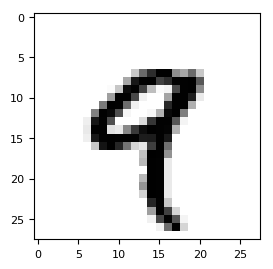

In [3]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); # Get the predictors X and the labels y
plt.imshow(X[4].reshape(28, 28), cmap=plt.cm.gray_r) # Take the first example, reshape to a 28x28 image and plot
print("Class label:",y[4]) # Print the correct class label

In [14]:
#READ THIS FIRST: Before executing this block, figure out how to take a subset of the mnist data set if trying new stuff.
#Otherwise this will take ages. test set accuracy is 0.97 btw for the whole set that took 20 minutes or so to calculate

from sklearn.model_selection import train_test_split # Importing splitting function to train and test model
from sklearn.neighbors import KNeighborsClassifier   # Import kNN function
#Perhaps do something like this to get only 10000 sets instead of the full 70000
# subset = mnist_data[0: 10000:1]
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)      #Maybe insert something here to only take 10% of the dataset
print(type(X))
print(type(y))
X_small = X[:2000]
y_small = y[:2000]
#print(X_small)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=1)           # Only 1 nearest neighbour
clf.fit(X_train, y_train)

print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

#prediction = knn.predict(X_test)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#Getting the score of our model on the test data.
#Score is 0.97 and thus the same as the test accaracy which is interesting and might be an indicator of a error in our code.
print("Score: {:.2f}".format(knn.score(X_test, y_test)))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Test set accuracy: 0.97


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Score: 0.97
Score: 0.97


In [16]:
#Finding a few misclassification. But I do not know if those brackets are correct or not.

j = 0
for i in range(5):  #Take a look at 5 misclassifications
    if y_pred[j] != y_test[j]: 
        plt.imshow(X[j].reshape(28, 28), cmap=plt.cm.gray_r)
        print("Class label:",y[j])
        i += 1
        j += 1
    else:
        j += 1

In [ ]:
# I copy pasted this from the introduction lecture, but i think this is correct, aside from perhaps a few things that need to be adapted
# Build a list of the training and test scores for increasing k
training_accuracy = []
test_accuracy = []
k = range(1, 11)   # testing 1 to 10 nearest neighbours

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()